In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
%run -i perceptron #　クラスファイルの読み込み

In [9]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/"
                 "machine-learning-databases/iris/iris.data", header = None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


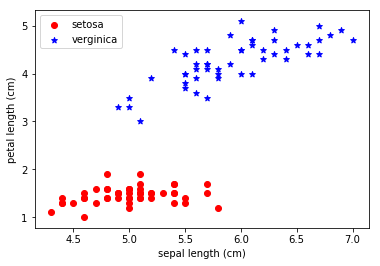

In [11]:
# extract target variables from 1st to 100th rows
y = df.iloc[0:100, 4].values

# Iris-setosa -> -1, Iris-verginica -> 1
y = np.where(y == "Iris-setosa", -1, 1)
X = df.iloc[0:100, [0,2]].values

# plot setosas and verginicas
plt.scatter(X[:50, 0], X[:50, 1], color = "red", marker = "o", label = "setosa")
plt.scatter(X[50:, 0], X[50:, 1], color = "blue", marker = "*", label = "verginica")
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.legend(loc = "upper left")
plt.show()


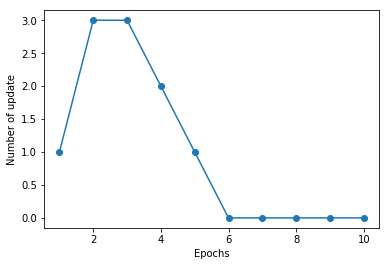

In [12]:
# construct perceptron object
ppn = Perceptron(eta = 0.1, n_iter = 10)

# fitting to training data
ppn.fit(X, y)

# plot line chart of errors
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = "o")
plt.xlabel("Epochs")
plt.ylabel("Number of update")
plt.show()

In [29]:
%run -i tools.py

In [28]:
#print(y)
#print(X)

(0, -1)
(1, 1)


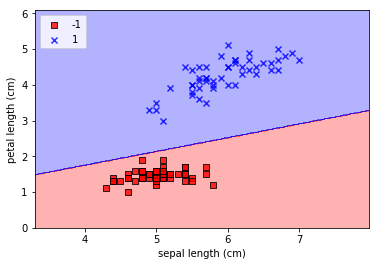

In [30]:
plot_decision_regions(X, y, classifier = ppn)
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.legend(loc = "upper left")
plt.show()

In [32]:
for idx, cl in enumerate(np.unique(y)):
    print(X[y == cl, 0], X[y == cl, 1])

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ] [1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.5 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4]
[7.  6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8
 6.2 5.6 5.9 6.1 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.
 6.7 6.3 5.6 5.5 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7] [4.7 4.5 4.9 4.  4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1
 4.5 3.9 4.8 4.  4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5
 4.7 4.4 4.1 4.  4.4 4.6 4.  3.3 4.2 4.2 4.2 4.3 3.  4.1]


In [55]:
%run -i ADALINE.py

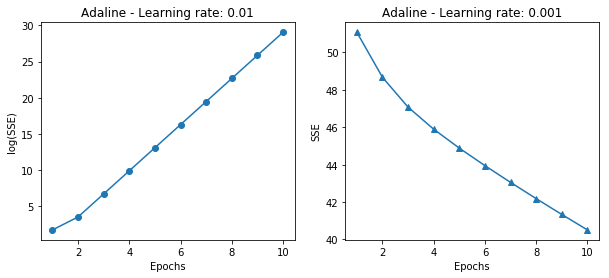

In [40]:
# split picture domain into 2 area
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))

# fitting ADALINE to data by gradient descent method.
ada1 = AdalineGD(n_iter = 10, eta = 0.01)
ada1.fit(X,y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker = "o")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(SSE)")
ax[0].set_title("Adaline - Learning rate: 0.01")

# fitting ADALINE to data by gradient descent(l-rate = 0.001)
ada2 = AdalineGD(n_iter = 10, eta = 0.0001)
ada2.fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker = "^")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("SSE")
ax[1].set_title("Adaline - Learning rate: 0.001")

plt.show()

In [57]:
X_std = np.copy(X)
X_std[:,0] = (X[:, 0]- X[:, 0].mean())/X[:, 0].std()
X_std[:,1] = (X[:, 1]- X[:, 1].mean())/X[:, 1].std()
#X_std

(0, -1)
(1, 1)


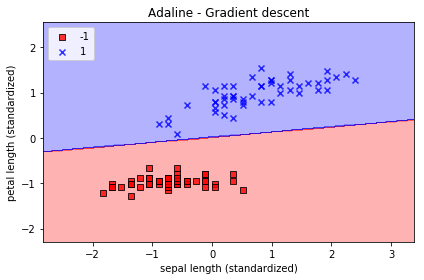

In [56]:
ada = AdalineGD(n_iter = 15, eta = 0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier = ada)
plt.title("Adaline - Gradient descent")
plt.xlabel("sepal length (standardized)")
plt.ylabel("petal length (standardized)")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

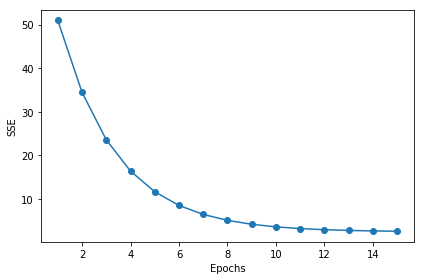

In [58]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker = "o")
plt.xlabel("Epochs")
plt.ylabel("SSE")
plt.tight_layout()
plt.show()

In [61]:
%run -i ADALINE.py

(0, -1)
(1, 1)


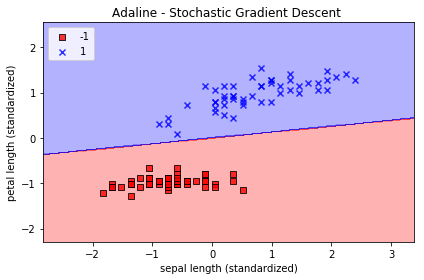

In [62]:
ada_sgd = AdalineSGD(n_iter = 15, eta = 0.01, random_state = 1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier = ada_sgd)
plt.title("Adaline - Stochastic Gradient Descent ")
plt.xlabel("sepal length (standardized)")
plt.ylabel("petal length (standardized)")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()


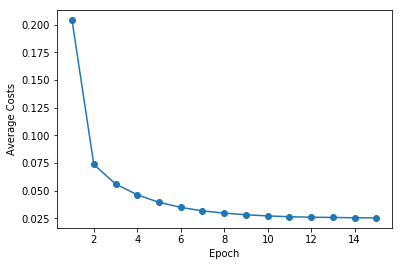

In [63]:
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker = "o")
plt.xlabel("Epoch")
plt.ylabel("Average Costs")
plt.show()